In [1]:

'''
EuroSAT Dataset Citation:

Helber, Patrick, et al. "EuroSAT: A Novel Dataset and Deep Learning Benchmark for Land Use and Land Cover Classification."
IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing 12.7 (2019): 2217-2226.
DOI: 10.1109/JSTARS.2019.2918242

Available at: https://github.com/phelber/EuroSAT '''

'\nEuroSAT Dataset Citation:\n\nHelber, Patrick, et al. "EuroSAT: A Novel Dataset and Deep Learning Benchmark for Land Use and Land Cover Classification."\nIEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing 12.7 (2019): 2217-2226.\nDOI: 10.1109/JSTARS.2019.2918242\n\nAvailable at: https://github.com/phelber/EuroSAT '

In [2]:
import os
import zipfile
import shutil
from google.colab import drive
drive.mount('/content/drive')

# Path to the ZIP file and target folder
zip_path = '/content/drive/MyDrive/EuroSAT_RGB.zip'
extract_to = '/content/euroSAT/'  # Extract here first

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
print(f"ZIP file extracted to '{extract_to}'")

# Check if a single folder is inside the extraction directory
extracted_content = os.listdir(extract_to)
if len(extracted_content) == 1 and os.path.isdir(os.path.join(extract_to, extracted_content[0])):
    # Move the contents of this folder up one level
    single_folder_path = os.path.join(extract_to, extracted_content[0])
    for item in os.listdir(single_folder_path):
        shutil.move(os.path.join(single_folder_path, item), extract_to)
    # Remove the now-empty single folder
    os.rmdir(single_folder_path)
    print(f"Moved contents of '{single_folder_path}' to '{extract_to}'")

# List all class folders to verify
class_folders = os.listdir(extract_to)
print("Class folders:", class_folders)

Mounted at /content/drive
ZIP file extracted to '/content/euroSAT/'
Moved contents of '/content/euroSAT/EuroSAT_RGB' to '/content/euroSAT/'
Class folders: ['SeaLake', 'Residential', 'River', 'AnnualCrop', 'Highway', 'Forest', 'HerbaceousVegetation', 'Industrial', 'Pasture', 'PermanentCrop']


In [3]:
import tensorflow as tf
import numpy as np
import os
import zipfile
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image_dataset_from_directory
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Define image size and batch size
img_size = (64, 64)
batch_size = 32
# Path to the actual images
data_dir = os.path.join(extract_to)
# Create the dataset using image_dataset_from_directory
full_ds = image_dataset_from_directory(
    extract_to,
    labels='inferred',
    label_mode='int',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

# Get class names from the dataset
class_names = full_ds.class_names
print("Class names:", class_names)



# Get images and labels from the dataset
image_paths = []
labels = []
images = []

for images_batch, labels_batch in full_ds:
    for i in range(images_batch.shape[0]):
        image_paths.append("N/A")
        labels.append(labels_batch[i].numpy())
        images.append(images_batch[i].numpy())

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Verify the data shapes
print(f"Training set: {train_images.shape}, {train_labels.shape}")
print(f"Testing set: {test_images.shape}, {test_labels.shape}")

# Normalize pixel values to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images

Found 27000 files belonging to 10 classes.
Class names: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
Training set: (21600, 64, 64, 3), (21600,)
Testing set: (5400, 64, 64, 3), (5400,)


Class names: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


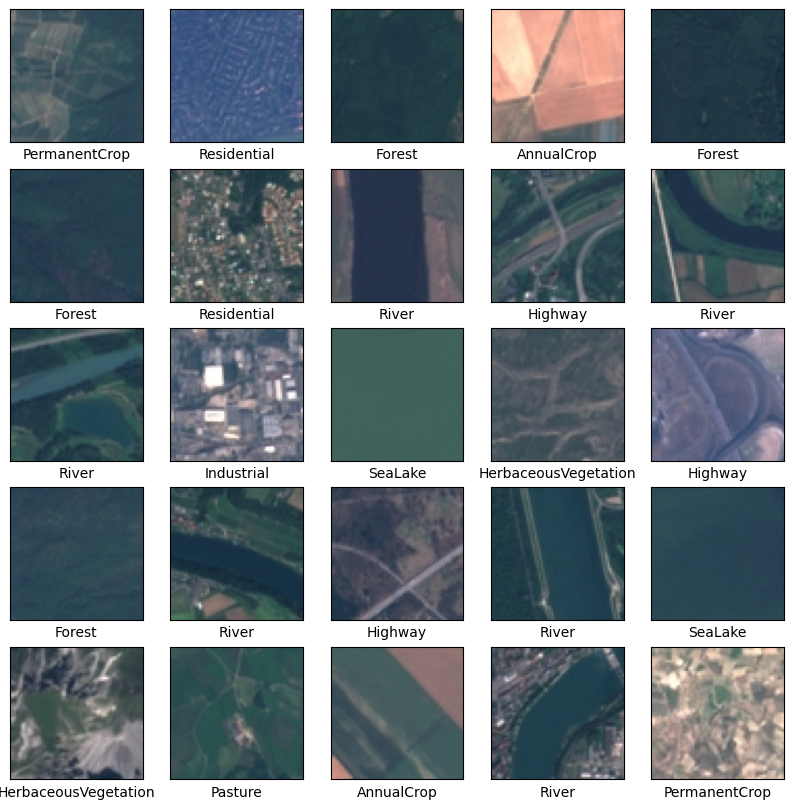

In [4]:
import matplotlib.pyplot as plt
class_names = full_ds.class_names
print("Class names:", class_names)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # Access the label directly using train_labels[i]
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define input shape
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(11))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 153s 223ms/step - accuracy: 0.3924 - loss: 1.5606 - val_accuracy: 0.1654 - val_loss: 762.7217
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 204s 225ms/step - accuracy: 0.6804 - loss: 0.8783 - val_accuracy: 0.1826 - val_loss: 946.6078
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 200s 223ms/step - accuracy: 0.7571 - loss: 0.6784 - val_accuracy: 0.1091 - val_loss: 1038.8474
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 239s 278ms/step - accuracy: 0.7887 - loss: 0.5862 - val_accuracy: 0.0994 - val_loss: 1502.5952
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 150s 222ms/step - accuracy: 0.8203 - loss: 0.5149 - val_accuracy: 0.1609 - val_loss: 1206.2839
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 200s 219ms/step - accuracy: 0.8291 - loss: 0.4815 - val_accuracy: 0.1726 - val_loss: 1567.6167
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 201s 218ms/step - accuracy: 0.8497 - loss: 0.4138 - val_accuracy: 0.2176 - val_loss: 1621.3721
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 149s 221ms/step -

Model Evaluation

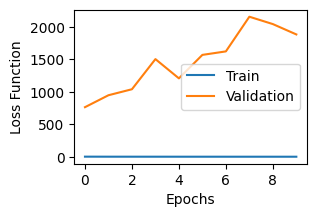

In [6]:
import matplotlib.pyplot as plt
# Set the figure size and dpi for the plot
plt.figure(figsize=(3, 2), dpi=100)

# Plot the training loss over epochs
plt.plot(np.array(history.history['loss']), label='Training Loss')

# Plot the validation loss over epochs
plt.plot(np.array(history.history['val_loss']), label='Validation Loss')

# Set labels for the axes
plt.ylabel('Loss Function')
plt.xlabel('Epochs')

# Add a legend to identify the lines in the plot
plt.legend(['Train', 'Validation'], loc='best')

# Display the plot
plt.show()

In [9]:
import numpy as np
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score

# Predict on test data
predictions = model.predict(test_images)  # Get logits
predicted_labels = np.argmax(predictions, axis=1)  # Convert logits to class labels

# Evaluate metrics
f1 = f1_score(test_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')

# Print metrics
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")




169/169 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step
F1 Score: 0.1324721534227102
Accuracy: 0.2187037037037037
Precision: 0.22224950233672336
Recall: 0.2187037037037037


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
